In [2]:
from IPython.display import YouTubeVideo

# 1. Intro To CNNs

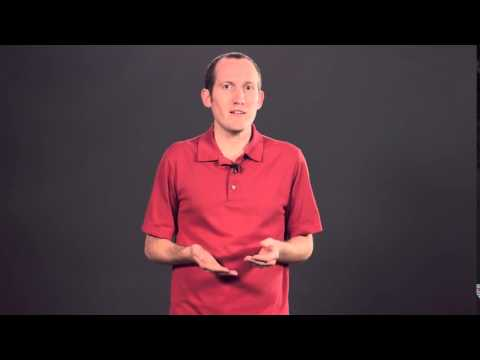

In [2]:
YouTubeVideo('B61jxZ4rkMs', width=720, height=400)

# 2. Color

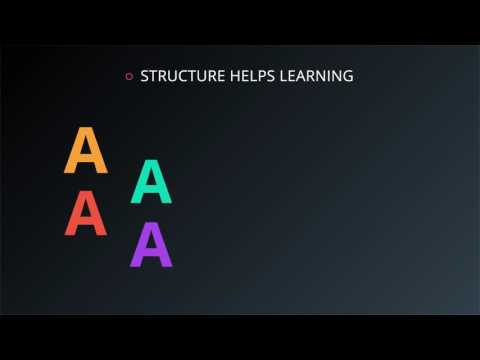

In [3]:
YouTubeVideo('BdQccpMwk80', width=720, height=400)

## QUIZ QUESTION

What would be easier for your classifier to learn?
- (A) R, G, B
- (B) (R + G + B) / 3

Answer: B

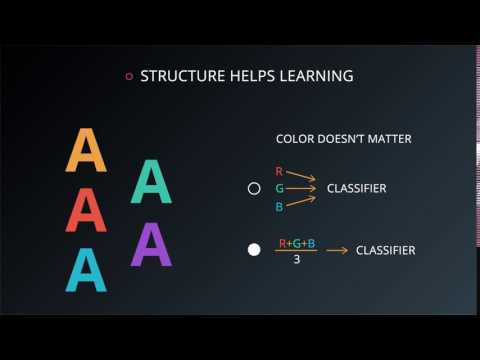

In [4]:
YouTubeVideo('xpyldyLlMFg', width=720, height=400)

# 3. Statistical Invariance

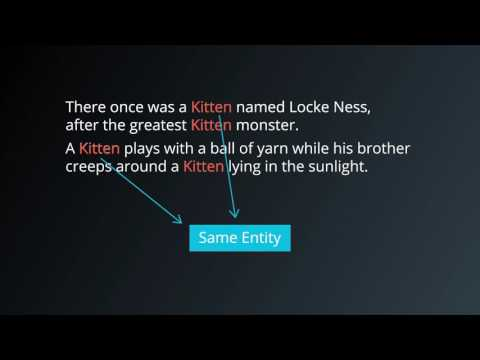

In [5]:
YouTubeVideo('0Hr5YwUUhr0', width=720, height=400)

# 4. Convolutional Networks

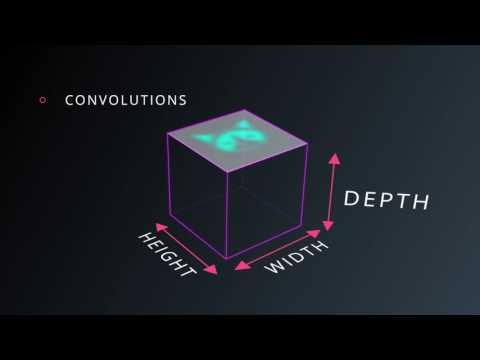

In [6]:
YouTubeVideo('ISHGyvsT0QY', width=720, height=400)

# 5. Intuition

Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches.

Let’s say we wanted to classify the following image of a dog as a Golden Retriever.

<img src="img/dog-1210559-1280.jpg" width=600>
<center>An image that we'd like to classify as a Golden Retriever.</center>

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

- A nose
- Two eyes
- Golden fur

These pieces can be seen below:

<img src="img/screen-shot-2016-11-24-at-12.49.08-pm.png" width=200>
<center>The eye of the dog.</center>

<img src="img/screen-shot-2016-11-24-at-12.49.43-pm.png" width=200>
<center>The nose of the dog.</center>

<img src="img/screen-shot-2016-11-24-at-12.50.54-pm.png" width=200>
<center>The fur of the dog.</center>

## Going One Step Further
But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below.

<img src="img/screen-shot-2016-11-24-at-12.51.47-pm.png" width=200>
<center>A curve that we can use to determine a nose.</center>

<img src="img/screen-shot-2016-11-24-at-12.51.51-pm.png" width=100>
<center>A nostrill that we can use to classify a nose of the dog.</center>

Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects.

In our case, the levels in the hierarchy are:

- Simple shapes, like ovals and dark circles
- Complex objects (combinations of simple shapes), like eyes, nose, and fur
- The dog as a whole (a combination of complex objects)

With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!

It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for.

<img src="img/heirarchy-diagram.jpg" width=600>
<center>An example of what each layer in a CNN might recognize when classifying a picture of a dog.</center>

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN learns **all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

That's a good start! Hopefully you've developed some intuition about how CNNs work.

Next, let’s look at some implementation details.

# 6. Filters

## Breaking up an Image
The first step for a CNN is to break up the image into smaller pieces. We do this by selecting a width and height that defines a filter.

The filter looks at small pieces, or patches, of the image. These patches are the same size as the filter.

<img src="img/vlcsnap-2016-11-24-15h52m47s438.png" width=600>
<center>As shown in the previous video, a CNN uses filters to split an image into smaller patches. The size of these patches matches the filter size</center>

We then simply slide this filter horizontally or vertically to focus on a different piece of the image.

The amount by which the filter slides is referred to as the 'stride'. The stride is a hyperparameter which you, the engineer, can tune. Increasing the stride reduces the size of your model by reducing the number of total patches each layer observes. However, this usually comes with a reduction in accuracy.

Let’s look at an example. In this zoomed in image of the dog, we first start with the patch outlined in red. The width and height of our filter define the size of this square.

<img src="img/retriever-patch.png" width=600>
<center>One patch of the Golden Retriever image</center>

We then move the square over to the right by a given stride (2 in this case) to get another patch.

<img src="img/retriever-patch-shifted.png" width=600>
<center>We move our square to the right by two pixels to create another patch.</center>

What's important here is that we are grouping together adjacent pixels and treating them as a collective.

In a normal, non-convolutional neural network, we would have ignored this adjacency. In a normal network, we would have connected every pixel in the input image to a neuron in the next layer. In doing so, we would not have taken advantage of the fact that pixels in an image are close together for a reason and have special meaning.

By taking advantage of this local structure, our CNN learns to classify local patterns, like shapes and objects, in an image.

## Filter Depth
It's common to have more than one filter. Different filters pick up different qualities of a patch. For example, one filter might look for a particular color, while another might look for a kind of object of a specific shape. The amount of filters in a convolutional layer is called the *filter depth*.

<img src="img/neilsen-pic.png" width=400>
<center>In the above example, a patch is connected to a neuron in the next layer. Source: Michael Nielse.</center>

How many neurons does each patch connect to?

That’s dependent on our filter depth. If we have a depth of k, we connect each patch of pixels to k neurons in the next layer. This gives us the height of k in the next layer, as shown below. In practice, k is a hyperparameter we tune, and most CNNs tend to pick the same starting values.

<img src="img/filter-depth.png" width=400>
<center>Chossing a filter depth of k connects each patch to k neurons in the next year.</center>

But why connect a single patch to multiple neurons in the next layer? Isn’t one neuron good enough?

Multiple neurons can be useful because a patch can have multiple interesting characteristics that we want to capture.

For example, one patch might include some white teeth, some blonde whiskers, and part of a red tongue. In that case, we might want a filter depth of at least three - one for each of teeth, whiskers, and tongue.

<img src="img/teeth-whiskers-tongue.png" width=300>
<center>This patch of the dog has many interesting features we may want to capture. These include the presence of teeth, the presence of whiskers, and the pink color of the tongue.</center>

Having multiple neurons for a given patch ensures that our CNN can learn to capture whatever characteristics the CNN learns are important.

Remember that the CNN isn't "programmed" to look for certain characteristics. Rather, it learns **on its own** which characteristics to notice.

# 7. Feature Map Sizes

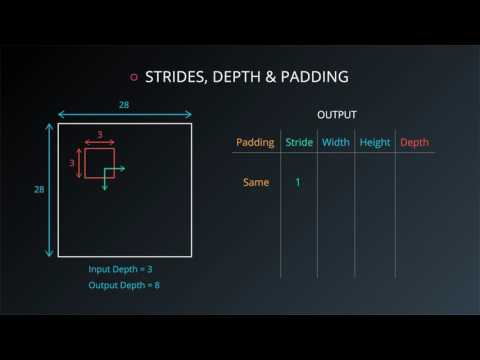

In [7]:
YouTubeVideo('lp1NrLZnCUM', width=720, height=400)

What are the width, height and depth for padding = 'same', stride = 1?

Enter your answers in the format "width, height, depth"

Answer: 28, 28, 8

<hr>

What are the width, height and depth for padding = 'valid', stride = 1?

Enter your answers in the format "width, height, depth"

Answer: 26, 26, 8

<hr>

What are the width, height and depth for padding = 'valid', stride = 2?

Enter your answers in the format "width, height, depth"

Answer: 13, 13, 8

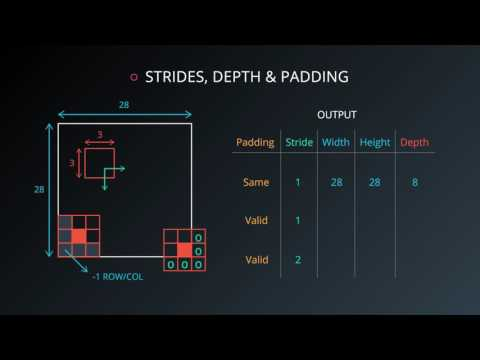

In [8]:
YouTubeVideo('W4xtf8LTz1c', width=720, height=400)

# 8. Convolutions continued

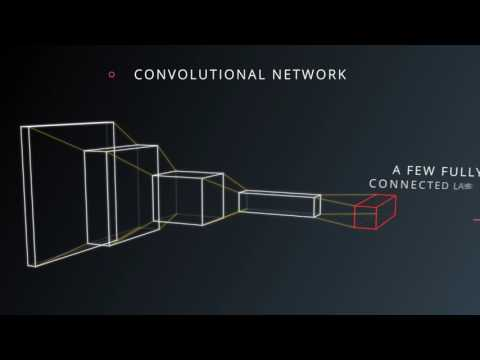

In [9]:
YouTubeVideo('utOv-BKI_vo', width=720, height=400)

Note, a "Fully Connected" layer is a standard, non convolutional layer, where all inputs are connected to all output neurons. This is also referred to as a "dense" layer, and is what we used in the previous two lessons.

# 9. Parameters

## Parameter Sharing

<img src="img/vlcsnap-2016-11-24-16h01m35s262.png" width=600>
<center>The weights, w, are shared across patches for a given layer in a CNN to detect the cat above regardless of where in the image it is located.</center>

When we are trying to classify a picture of a cat, we don’t care where in the image a cat is. If it’s in the top left or the bottom right, it’s still a cat in our eyes. We would like our CNNs to also possess this ability known as translation invariance. How can we achieve this?

As we saw earlier, the classification of a given patch in an image is determined by the weights and biases corresponding to that patch.

If we want a cat that’s in the top left patch to be classified in the same way as a cat in the bottom right patch, we need the weights and biases corresponding to those patches to be the same, so that they are classified the same way.

This is exactly what we do in CNNs. The weights and biases we learn for a given output layer are shared across all patches in a given input layer. Note that as we increase the depth of our filter, the number of weights and biases we have to learn still increases, as the weights aren't shared across the output channels.

There’s an additional benefit to sharing our parameters. If we did not reuse the same weights across all patches, we would have to learn new parameters for every single patch and hidden layer neuron pair. This does not scale well, especially for higher fidelity images. Thus, sharing parameters not only helps us with translation invariance, but also gives us a smaller, more scalable model.

## Padding

<img src="img/screen-shot-2016-11-24-at-10.05.37-pm.png" width=300>
<center>A 5x5 grid with a 3x3 filter. Source: Andrej Karpathy.</center>

## QUIZ QUESTION

Let's say we have a 5x5 grid (as shown above) and a filter of size 3x3 with a stride of 1. What's the width and height of the next layer?

Answer: 3x3. We see that we can fit at most three patches in each direction, giving us a dimension of 3x3 in our next layer.

<hr>

As we can see, the width and height of each subsequent layer decreases in the above scheme.

In an ideal world, we'd be able to maintain the same width and height across layers so that we can continue to add layers without worrying about the dimensionality shrinking and so that we have consistency. How might we achieve this? One way is to simply add a border of 0s to our original 5x5 image. You can see what this looks like in the below image.

<img src="img/screen-shot-2016-11-24-at-10.05.46-pm.png" width=400>
<center>The same grid with 0 padding. Source: Andrej Karpathy.</center>

This would expand our original image to a 7x7. With this, we now see how our next layer's size is again a 5x5, keeping our dimensionality consistent.

## Dimensionality
From what we've learned so far, how can we calculate the number of neurons of each layer in our CNN?

Given:

- our input layer has a width of W and a height of H
- our convolutional layer has a filter size F
- we have a stride of S
- a padding of P
- and the number of filters K,

the following formula gives us the width of the next layer: `W_out =[ (W−F+2P)/S] + 1`.

The output height would be `H_out = [(H-F+2P)/S] + 1`.

And the output depth would be equal to the number of filters `D_out = K`.

The output volume would be `W_out * H_out * D_out`.

Knowing the dimensionality of each additional layer helps us understand how large our model is and how our decisions around filter size and stride affect the size of our network.

# 10. Quiz: Convolution Output Shape

## Introduction
For the next few quizzes we'll test your understanding of the dimensions in CNNs. Understanding dimensions will help you make accurate tradeoffs between model size and performance. As you'll see, some parameters have a much bigger impact on model size than others.

## Setup
H = height, W = width, D = depth

- We have an input of shape 32x32x3 (HxWxD)
- 20 filters of shape 8x8x3 (HxWxD)
- A stride of 2 for both the height and width (S)
- With padding of size 1 (P)

Recall the formula for calculating the new height or width:

```
new_height = (input_height - filter_height + 2 * P)/S + 1
new_width = (input_width - filter_width + 2 * P)/S + 1
```


Convolutional Layer Output Shape
What's the shape of the output?

The answer format is HxWxD, so if you think the new height is 9, new width is 9, and new depth is 5, then type 9x9x5.

Answer: 14x14x20

# 11. Solution: Convolution Output Shape

## Solution
The answer is 14x14x20.

We can get the new height and width with the formula resulting in:

```
(32 - 8 + 2 * 1)/2 + 1 = 14
(32 - 8 + 2 * 1)/2 + 1 = 14
```

The new depth is equal to the number of filters, which is 20.
This would correspond to the following code:

```python
input = tf.placeholder(tf.float32, (None, 32, 32, 3))
filter_weights = tf.Variable(tf.truncated_normal((8, 8, 3, 20))) # (height, width, input_depth, output_depth)
filter_bias = tf.Variable(tf.zeros(20))
strides = [1, 2, 2, 1] # (batch, height, width, depth)
padding = 'SAME'
conv = tf.nn.conv2d(input, filter_weights, strides, padding) + filter_bias
```

Note the output shape of conv will be [1, 16, 16, 20]. It's 4D to account for batch size, but more importantly, it's not [1, 14, 14, 20]. This is because the padding algorithm TensorFlow uses is not exactly the same as the one above. An alternative algorithm is to switch padding from 'SAME' to 'VALID' which would result in an output shape of [1, 13, 13, 20]. If you're curious how padding works in TensorFlow, read [this document](https://www.tensorflow.org/api_guides/python/nn#Convolution).

In summary TensorFlow uses the following equation for 'SAME' vs 'VALID'

**SAME Padding**, the output height and width are computed as:

out_height = ceil(float(in_height) / float(strides[1]))

out_width = ceil(float(in_width) / float(strides[2]))

**VALID Padding**, the output height and width are computed as:

out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))

out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))
NEXT

# 12. Quiz: Number of Parameters

We're now going to calculate the number of parameters of the convolutional layer. The answer from the last quiz will come into play here!

Being able to calculate the number of parameters in a neural network is useful since we want to have control over how much memory a neural network uses.

## Setup
H = height, W = width, D = depth

- We have an input of shape 32x32x3 (HxWxD)
- 20 filters of shape 8x8x3 (HxWxD)
- A stride of 2 for both the height and width (S)
- Zero padding of size 1 (P)

## Output Layer
- 14x14x20 (HxWxD)

## Hint
Without parameter sharing, each neuron in the output layer must connect to each neuron in the filter. In addition, each neuron in the output layer must also connect to a single bias neuron.

### Convolution Layer Parameters 1
How many parameters does the convolutional layer have (without parameter sharing)?

# 13. Solution: Number of Parameters

Solution
There are 756560 total parameters. That's a HUGE amount! Here's how we calculate it:
```
(8 * 8 * 3 + 1) * (14 * 14 * 20) = 756560
```

`8 * 8 * 3` is the number of weights, we add 1 for the bias. Remember, each weight is assigned to every single part of the output `(14 * 14 * 20)`. So we multiply these two numbers together and we get the final answer.

# 14. Quiz: Parameter Sharing

Now we'd like you to calculate the number of parameters in the convolutional layer, if every neuron in the output layer shares its parameters with every other neuron in its same channel.

This is the number of parameters actually used in a convolution layer ([tf.nn.conv2d()](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)).

## Setup
H = height, W = width, D = depth

- We have an input of shape `32x32x3 (HxWxD)`
- 20 filters of shape `8x8x3 (HxWxD)`
- A stride of 2 for both the height and width (S)
- Zero padding of size 1 (P)

## Output Layer
- `14x14x20 (HxWxD)`


## Hint
With parameter sharing, each neuron in an output channel shares its weights with every other neuron in that channel. So the number of parameters is equal to the number of neurons in the filter, plus a bias neuron, all multiplied by the number of channels in the output layer.

### Convolution Layer Parameters 2
How many parameters does the convolution layer have (with parameter sharing)?

# 15. Solution: Parameter Sharing

## Solution

There are 3860 total parameters. That's 196 times fewer parameters! Here's how the answer is calculated:

```
(8 * 8 * 3 + 1) * 20 = 3840 + 20 = 3860
```

That's 3840 weights and 20 biases. This should look similar to the answer from the previous quiz. The difference being it's just 20 instead of `(14 * 14 * 20)`. Remember, with weight sharing we use the same filter for an entire depth slice. Because of this we can get rid of `14 * 14` and be left with only 20.

# 16. Visualizing CNNs

## Visualizing CNNs
Let’s look at an example CNN to see how it works in action.

The CNN we will look at is trained on ImageNet as described in [this paper](http://www.matthewzeiler.com/pubs/arxive2013/eccv2014.pdf) by Zeiler and Fergus. In the images below (from the same paper), we’ll see what each layer in this network detects and see how each layer detects more and more complex ideas.

## Layer 1

<img src="img/layer-1-grid.png" width=200>
<center>Example patterns that cause activations in the first layer of the network. These range from simple diagonal lines (top left) to green blobs (bottom middle).</center>

Example patterns that cause activations in the first layer of the network. These range from simple diagonal lines (top left) to green blobs (bottom middle).
The images above are from Matthew Zeiler and Rob Fergus' [deep visualization toolbox](https://www.youtube.com/watch?v=ghEmQSxT6tw), which lets us visualize what each layer in a CNN focuses on.

Each image in the above grid represents a pattern that causes the neurons in the first layer to activate - in other words, they are patterns that the first layer recognizes. The top left image shows a -45 degree line, while the middle top square shows a +45 degree line. These squares are shown below again for reference.

<img src="img/diagonal-line-1.png" width=100>
<center>As visualized here, the first layer of the CNN can recognize -45 degree lines.</center>

<img src="img/diagonal-line-2.png" width=100>
<center>The first layer of the CNN is also able to recognize +45 degree lines, like the one above.</center>


Let's now see some example images that cause such activations. The below grid of images all activated the -45 degree line. Notice how they are all selected despite the fact that they have different colors, gradients, and patterns.

<img src="img/grid-layer-1.png" width=200>
<center>Example patches that activate the -45 degree line detector in the first layer.</center>

So, the first layer of our CNN clearly picks out very simple shapes and patterns like lines and blobs.

## Layer 2

<img src="img/screen-shot-2016-11-24-at-12.09.02-pm.png">
<center>A visualization of the second layer in the CNN. Notice how we are picking up more complex ideas like circles and stripes. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The second layer of the CNN captures complex ideas.

As you see in the image above, the second layer of the CNN recognizes circles (second row, second column), stripes (first row, second column), and rectangles (bottom right).

**The CNN learns to do this on its own.** There is no special instruction for the CNN to focus on more complex objects in deeper layers. That's just how it normally works out when you feed training data into a CNN.

## Layer 3

<img src="img/screen-shot-2016-11-24-at-12.09.24-pm.png">
<center>A visualization of the third layer in the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The third layer picks out complex combinations of features from the second layer. These include things like grids, and honeycombs (top left), wheels (second row, second column), and even faces (third row, third column).

We'll skip layer 4, which continues this progression, and jump right to the fifth and final layer of this CNN.

## Layer 5

<img src="img/screen-shot-2016-11-24-at-12.08.11-pm.png">
<center>A visualization of the fifth and final layer of the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The last layer picks out the highest order ideas that we care about for classification, like dog faces, bird faces, and bicycles.

## On to TensorFlow
This concludes our high-level discussion of Convolutional Neural Networks.

Next you'll practice actually building these networks in TensorFlow.

# 17. TensorFlow Convolution Layer

Let's examine how to implement a CNN in TensorFlow.

TensorFlow provides the [tf.nn.conv2d()](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) and [tf.nn.bias_add()](https://www.tensorflow.org/api_docs/python/tf/nn/bias_add) functions to create your own convolutional layers.

```python
# Output depth
k_output = 64

# Image Properties
image_width = 10
image_height = 10
color_channels = 3

# Convolution filter
filter_size_width = 5
filter_size_height = 5

# Input/Image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_height, image_width, color_channels])

# Weight and bias
weight = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

# Apply Convolution
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
# Add bias
conv_layer = tf.nn.bias_add(conv_layer, bias)
# Apply activation function
conv_layer = tf.nn.relu(conv_layer)
```

The code above uses the tf.nn.conv2d() function to compute the convolution with weight as the filter and [1, 2, 2, 1] for the strides. TensorFlow uses a stride for each input dimension, [batch, input_height, input_width, input_channels]. We are generally always going to set the stride for batch and input_channels (i.e. the first and fourth element in the strides array) to be 1.

You'll focus on changing input_height and input_width while setting batch and input_channels to 1. The input_height and input_width strides are for striding the filter over input. This example code uses a stride of 2 with 5x5 filter over input.

The tf.nn.bias_add() function adds a 1-d bias to the last dimension in a matrix.

# 18. Explore The Design Space

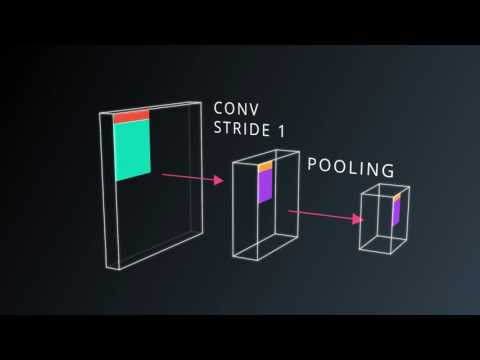

In [3]:
YouTubeVideo('FG7M9tWH2nQ', width=720, height=400)

# 19. TensorFlow Max Pooling

<img src="img/max-pooling.png" width=600>
<center>By Aphex34 (Own work) [CC BY-SA 4.0 (http://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons</center>

The image above is an example of max pooling with a 2x2 filter and stride of 2. The four 2x2 colors represent each time the filter was applied to find the maximum value.

For example, [[1, 0], [4, 6]] becomes 6, because 6 is the maximum value in this set. Similarly, [[2, 3], [6, 8]] becomes 8.

Conceptually, the benefit of the max pooling operation is to reduce the size of the input, and allow the neural network to focus on only the most important elements. Max pooling does this by only retaining the maximum value for each filtered area, and removing the remaining values.

TensorFlow provides the [tf.nn.max_pool()](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool) function to apply [max pooling](https://en.wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer) to your convolutional layers.

```python
...
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
conv_layer = tf.nn.bias_add(conv_layer, bias)
conv_layer = tf.nn.relu(conv_layer)
# Apply Max Pooling
conv_layer = tf.nn.max_pool(
    conv_layer,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME')
```

The tf.nn.max_pool() function performs max pooling with the ksize parameter as the size of the filter and the strides parameter as the length of the stride. 2x2 filters with a stride of 2x2 are common in practice.

The ksize and strides parameters are structured as 4-element lists, with each element corresponding to a dimension of the input tensor ([batch, height, width, channels]). For both ksize and strides, the batch and channel dimensions are typically set to 1.
NEXT

# 20. Quiz: Pooling Intuition

The next few quizzes will test your understanding of pooling layers.

QUIZ QUESTION

A pooling layer is generally used to ...

- (A) Increase the size of the output
- (B) Decrease the size of the output
- (C) Prevent overfitting
- (D) Gain information



# 21. Solution: Pooling Intuition

The correct answer is decrease the size of the output and prevent overfitting. Preventing overfitting is a consequence of reducing the output size, which in turn, reduces the number of parameters in future layers.

Recently, pooling layers have fallen out of favor. Some reasons are:

- Recent datasets are so big and complex we're more concerned about underfitting.
- Dropout is a much better regularizer.
- Pooling results in a loss of information. Think about the max pooling operation as an example. We only keep the largest of n numbers, thereby disregarding n-1 numbers completely.

# 22. Quiz: Pooling Mechanics

## Setup
H = height, W = width, D = depth

- We have an input of shape `4x4x5 (HxWxD)`
- Filter of shape `2x2 (HxW)`
- A stride of 2 for both the height and width (S)

Recall the formula for calculating the new height or width:

```
new_height = (input_height - filter_height)/S + 1
new_width = (input_width - filter_width)/S + 1
```

NOTE: For a pooling layer the output depth is the same as the input depth. Additionally, the pooling operation is applied individually for each depth slice.

The image below gives an example of how a max pooling layer works. In this case, the max pooling filter has a shape of `2x2`. As the max pooling filter slides across the input layer, the filter will output the maximum value of the `2x2` square.

<img src="img/convolutionalnetworksquiz.png" width=600>

## Pooling Layer Output Shape
What's the shape of the output? Format is HxWxD.


# 23. Solution: Pooling Mechanics

## Solution
The answer is 2x2x5. Here's how it's calculated using the formula:

```
(4 - 2)/2 + 1 = 2
(4 - 2)/2 + 1 = 2
```

The depth stays the same.
Here's the corresponding code:

```python
input = tf.placeholder(tf.float32, (None, 4, 4, 5))
filter_shape = [1, 2, 2, 1]
strides = [1, 2, 2, 1]
padding = 'VALID'
pool = tf.nn.max_pool(input, filter_shape, strides, padding)
```

The output shape of pool will be [1, 2, 2, 5], even if padding is changed to 'SAME'.

# 24. Quiz: Pooling Practice

Great, now let's practice doing some pooling operations manually.

## Max Pooling
What's the result of a max pooling operation on the input:

```
[[[0, 1, 0.5, 10],
   [2, 2.5, 1, -8],
   [4, 0, 5, 6],
   [15, 1, 2, 3]]]
```

Assume the filter is 2x2 and the stride is 2 for both height and width. The output shape is 2x2x1.

The answering format will be 4 numbers, each separated by a comma, such as: 1,2,3,4.

Work from the top left to the bottom right


# 25. Solution: Pooling Practice

## Solution

The correct answer is 2.5,10,15,6. We start with the four numbers in the top left corner. Then we work left-to-right and top-to-bottom, moving 2 units each time.

```
max(0, 1, 2, 2.5) = 2.5
max(0.5, 10, 1, -8) = 10
max(4, 0, 15, 1) = 15
max(5, 6, 2, 3) = 6
```

# 26. Quiz: Average Pooling

## Mean Pooling

What's the result of a average (or mean) pooling?

```
[[[0, 1, 0.5, 10],
   [2, 2.5, 1, -8],
   [4, 0, 5, 6],
   [15, 1, 2, 3]]]
```

Assume the filter is 2x2 and the stride is 2 for both height and width. The output shape is 2x2x1.

The answering format will be 4 numbers, each separated by a comma, such as: 1,2,3,4.

**Answer to 3 decimal places. Work from the top left to the bottom right**


# 27. Solution: Average Pooling

## Solution

The correct answer is 1.375, 0.875, 5,4. We start with the four numbers in the top left corner. Then we work left-to-right and top-to-bottom, moving 2 units each time.

```
mean(0, 1, 2, 2.5) = 1.375
mean(0.5, 10, 1, -8) = 0.875
mean(4, 0, 15, 1) = 5
mean(5, 6, 2, 3) = 4
```

# 28. 1x1 Convolutions

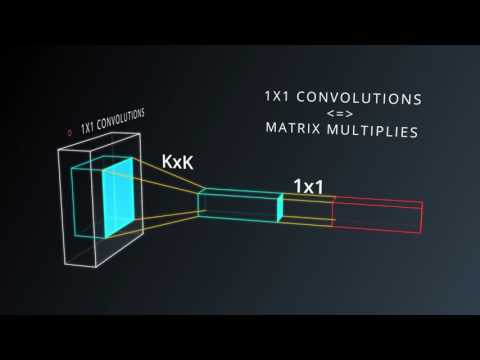

In [4]:
YouTubeVideo('Zmzgerm6SjA', width=720, height=400)

# 29. Inception Module

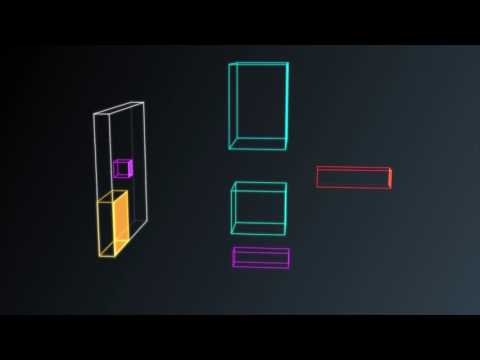

In [5]:
YouTubeVideo('SlTm03bEOxA', width=720, height=400)

# 30. Convolutional Network in TensorFlow

It's time to walk through an example Convolutional Neural Network (CNN) in TensorFlow.

The structure of this network follows the classic structure of CNNs, which is a mix of convolutional layers and max pooling, followed by fully-connected layers.

The code you'll be looking at is similar to what you saw in the segment on **Deep Neural Network in TensorFlow** in the previous lesson, except we restructured the architecture of this network as a CNN.

Just like in that segment, here you'll study the line-by-line breakdown of the code. If you want, you can even [download the code and run it yourself](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58a61ca1_cnn/cnn.zip).

Thanks to [Aymeric Damien](https://github.com/aymericdamien/TensorFlow-Examples) for providing the original TensorFlow model on which this segment is based.

Time to dive in!

## Dataset
You've seen this section of code from previous lessons. Here we're importing the MNIST dataset and using a convenient TensorFlow function to batch, scale, and One-Hot encode the data.

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.00001
# epochs = 10
epochs = 5
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


## Weights and Biases

In [19]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))}

## Convolutions

<img src="img/convolution-schematic.gif" width=400>
<center>Convolution with 3×3 Filter. Source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution</center>

The above is an example of a [convolution](https://en.wikipedia.org/wiki/Convolution) with a 3x3 filter and a stride of 1 being applied to data with a range of 0 to 1. The convolution for each 3x3 section is calculated against the weight, [[1, 0, 1], [0, 1, 0], [1, 0, 1]], then a bias is added to create the convolved feature on the right. In this case, the bias is zero. In TensorFlow, this is all done using [tf.nn.conv2d()](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) and [tf.nn.bias_add()](https://www.tensorflow.org/api_docs/python/tf/nn/bias_add).

In [20]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

The [tf.nn.conv2d()](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) function computes the convolution against weight W as shown above.

In TensorFlow, strides is an array of 4 elements; the first element in this array indicates the stride for batch and last element indicates stride for features. It's good practice to remove the batches or features you want to skip from the data set rather than use a stride to skip them. You can always set the first and last element to 1 in strides in order to use all batches and features.

The middle two elements are the strides for height and width respectively. I've mentioned stride as one number because you usually have a square stride where height = width. When someone says they are using a stride of 3, they usually mean tf.nn.conv2d(x, W, strides=[1, 3, 3, 1]).

To make life easier, the code is using [tf.nn.bias_add()](https://www.tensorflow.org/api_docs/python/tf/nn/bias_add) to add the bias. Using [tf.add()](https://www.tensorflow.org/api_docs/python/tf/add) doesn't work when the tensors aren't the same shape.

## Max Pooling

<img src="img/maxpool.jpeg">
<center>Max Pooling with 2x2 filter and stride of 2. Source: http://cs231n.github.io/convolutional-networks/</center>

The above is an example of [max pooling](https://en.wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer) with a 2x2 filter and stride of 2. The left square is the input and the right square is the output. The four 2x2 colors in input represents each time the filter was applied to create the max on the right side. For example, [[1, 1], [5, 6]] becomes 6 and [[3, 2], [1, 2]] becomes 3.

In [21]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

The [tf.nn.max_pool()](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool) function does exactly what you would expect, it performs max pooling with the ksize parameter as the size of the filter.

## Model
<img src="img/arch.png">
<center>Image from Explore The Design Space video</center>

In the code below, we're creating 3 layers alternating between convolutions and max pooling followed by a fully connected and output layer. The transformation of each layer to new dimensions are shown in the comments. For example, the first layer shapes the images from 28x28x1 to 28x28x32 in the convolution step. Then next step applies max pooling, turning each sample into 14x14x32. All the layers are applied from conv1 to output, producing 10 class predictions.

In [22]:
def conv_net(x, weights, biases, dropout):
    # Layer 1 - 28*28*1 to 14*14*32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer - 7*7*64 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

## Session
Now let's run it!

In [23]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf. global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} -'
                  'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: mnist.test.images[:test_valid_size],
        y: mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

Epoch  1, Batch   1 -Loss: 55692.5469 Validation Accuracy: 0.042969
Epoch  1, Batch   2 -Loss: 47510.9531 Validation Accuracy: 0.093750
Epoch  1, Batch   3 -Loss: 43780.7578 Validation Accuracy: 0.101562
Epoch  1, Batch   4 -Loss: 37607.2148 Validation Accuracy: 0.109375
Epoch  1, Batch   5 -Loss: 33504.0977 Validation Accuracy: 0.113281
Epoch  1, Batch   6 -Loss: 32436.1250 Validation Accuracy: 0.128906
Epoch  1, Batch   7 -Loss: 25869.0742 Validation Accuracy: 0.136719
Epoch  1, Batch   8 -Loss: 28617.6406 Validation Accuracy: 0.167969
Epoch  1, Batch   9 -Loss: 25578.6562 Validation Accuracy: 0.179688
Epoch  1, Batch  10 -Loss: 23613.3164 Validation Accuracy: 0.175781
Epoch  1, Batch  11 -Loss: 22770.6484 Validation Accuracy: 0.167969
Epoch  1, Batch  12 -Loss: 22180.4824 Validation Accuracy: 0.164062
Epoch  1, Batch  13 -Loss: 24596.3184 Validation Accuracy: 0.187500
Epoch  1, Batch  14 -Loss: 19727.6953 Validation Accuracy: 0.210938
Epoch  1, Batch  15 -Loss: 18506.2383 Validation

Epoch  1, Batch 122 -Loss:  4240.2051 Validation Accuracy: 0.601562
Epoch  1, Batch 123 -Loss:  5047.9365 Validation Accuracy: 0.597656
Epoch  1, Batch 124 -Loss:  5244.3145 Validation Accuracy: 0.589844
Epoch  1, Batch 125 -Loss:  3848.6658 Validation Accuracy: 0.593750
Epoch  1, Batch 126 -Loss:  4006.6699 Validation Accuracy: 0.601562
Epoch  1, Batch 127 -Loss:  3302.9810 Validation Accuracy: 0.597656
Epoch  1, Batch 128 -Loss:  4017.6785 Validation Accuracy: 0.593750
Epoch  1, Batch 129 -Loss:  4177.4214 Validation Accuracy: 0.593750
Epoch  1, Batch 130 -Loss:  3613.5791 Validation Accuracy: 0.585938
Epoch  1, Batch 131 -Loss:  3815.0581 Validation Accuracy: 0.605469
Epoch  1, Batch 132 -Loss:  4889.0479 Validation Accuracy: 0.597656
Epoch  1, Batch 133 -Loss:  4261.5752 Validation Accuracy: 0.605469
Epoch  1, Batch 134 -Loss:  2690.1741 Validation Accuracy: 0.601562
Epoch  1, Batch 135 -Loss:  3902.7917 Validation Accuracy: 0.605469
Epoch  1, Batch 136 -Loss:  3979.0798 Validation

Epoch  1, Batch 243 -Loss:  2372.1895 Validation Accuracy: 0.699219
Epoch  1, Batch 244 -Loss:  2727.9194 Validation Accuracy: 0.703125
Epoch  1, Batch 245 -Loss:  1999.7917 Validation Accuracy: 0.699219
Epoch  1, Batch 246 -Loss:  1977.1771 Validation Accuracy: 0.699219
Epoch  1, Batch 247 -Loss:  2550.8525 Validation Accuracy: 0.703125
Epoch  1, Batch 248 -Loss:  2585.8225 Validation Accuracy: 0.703125
Epoch  1, Batch 249 -Loss:  2070.2676 Validation Accuracy: 0.707031
Epoch  1, Batch 250 -Loss:  1795.6704 Validation Accuracy: 0.714844
Epoch  1, Batch 251 -Loss:  3020.0059 Validation Accuracy: 0.714844
Epoch  1, Batch 252 -Loss:  2447.3381 Validation Accuracy: 0.722656
Epoch  1, Batch 253 -Loss:  2301.5361 Validation Accuracy: 0.710938
Epoch  1, Batch 254 -Loss:  2882.4595 Validation Accuracy: 0.710938
Epoch  1, Batch 255 -Loss:  1692.2283 Validation Accuracy: 0.707031
Epoch  1, Batch 256 -Loss:  2417.1924 Validation Accuracy: 0.707031
Epoch  1, Batch 257 -Loss:  2084.2434 Validation

Epoch  1, Batch 364 -Loss:  1824.2671 Validation Accuracy: 0.730469
Epoch  1, Batch 365 -Loss:  2036.9399 Validation Accuracy: 0.730469
Epoch  1, Batch 366 -Loss:  1830.2469 Validation Accuracy: 0.734375
Epoch  1, Batch 367 -Loss:  1253.8921 Validation Accuracy: 0.726562
Epoch  1, Batch 368 -Loss:  1672.0436 Validation Accuracy: 0.726562
Epoch  1, Batch 369 -Loss:  1603.3867 Validation Accuracy: 0.730469
Epoch  1, Batch 370 -Loss:  1172.4697 Validation Accuracy: 0.730469
Epoch  1, Batch 371 -Loss:  1196.0851 Validation Accuracy: 0.734375
Epoch  1, Batch 372 -Loss:  1749.0996 Validation Accuracy: 0.730469
Epoch  1, Batch 373 -Loss:  1374.1348 Validation Accuracy: 0.738281
Epoch  1, Batch 374 -Loss:  1367.3420 Validation Accuracy: 0.738281
Epoch  1, Batch 375 -Loss:  1291.0751 Validation Accuracy: 0.734375
Epoch  1, Batch 376 -Loss:  1091.1830 Validation Accuracy: 0.742188
Epoch  1, Batch 377 -Loss:  1403.9434 Validation Accuracy: 0.742188
Epoch  1, Batch 378 -Loss:  1794.9016 Validation

Epoch  2, Batch  56 -Loss:  1211.2814 Validation Accuracy: 0.777344
Epoch  2, Batch  57 -Loss:  1884.3411 Validation Accuracy: 0.781250
Epoch  2, Batch  58 -Loss:  1228.0466 Validation Accuracy: 0.773438
Epoch  2, Batch  59 -Loss:  1378.6270 Validation Accuracy: 0.777344
Epoch  2, Batch  60 -Loss:  1201.5531 Validation Accuracy: 0.765625
Epoch  2, Batch  61 -Loss:  1530.5315 Validation Accuracy: 0.761719
Epoch  2, Batch  62 -Loss:  1032.3611 Validation Accuracy: 0.769531
Epoch  2, Batch  63 -Loss:   996.2045 Validation Accuracy: 0.765625
Epoch  2, Batch  64 -Loss:  1038.4033 Validation Accuracy: 0.769531
Epoch  2, Batch  65 -Loss:  1604.5879 Validation Accuracy: 0.785156
Epoch  2, Batch  66 -Loss:  1554.7998 Validation Accuracy: 0.777344
Epoch  2, Batch  67 -Loss:  1038.3491 Validation Accuracy: 0.769531
Epoch  2, Batch  68 -Loss:   852.0646 Validation Accuracy: 0.773438
Epoch  2, Batch  69 -Loss:   977.1086 Validation Accuracy: 0.769531
Epoch  2, Batch  70 -Loss:  1016.7549 Validation

Epoch  2, Batch 177 -Loss:   941.7053 Validation Accuracy: 0.792969
Epoch  2, Batch 178 -Loss:  1102.9440 Validation Accuracy: 0.789062
Epoch  2, Batch 179 -Loss:  1286.9812 Validation Accuracy: 0.789062
Epoch  2, Batch 180 -Loss:  1313.7683 Validation Accuracy: 0.789062
Epoch  2, Batch 181 -Loss:  1242.6495 Validation Accuracy: 0.789062
Epoch  2, Batch 182 -Loss:  1139.5754 Validation Accuracy: 0.789062
Epoch  2, Batch 183 -Loss:  1004.9172 Validation Accuracy: 0.789062
Epoch  2, Batch 184 -Loss:   836.3374 Validation Accuracy: 0.789062
Epoch  2, Batch 185 -Loss:   955.3136 Validation Accuracy: 0.792969
Epoch  2, Batch 186 -Loss:   700.2118 Validation Accuracy: 0.785156
Epoch  2, Batch 187 -Loss:  1173.9480 Validation Accuracy: 0.785156
Epoch  2, Batch 188 -Loss:   999.6101 Validation Accuracy: 0.785156
Epoch  2, Batch 189 -Loss:  1077.2919 Validation Accuracy: 0.781250
Epoch  2, Batch 190 -Loss:  1120.7515 Validation Accuracy: 0.785156
Epoch  2, Batch 191 -Loss:  1182.1285 Validation

Epoch  2, Batch 298 -Loss:  1029.2031 Validation Accuracy: 0.800781
Epoch  2, Batch 299 -Loss:   955.8584 Validation Accuracy: 0.792969
Epoch  2, Batch 300 -Loss:   566.7527 Validation Accuracy: 0.796875
Epoch  2, Batch 301 -Loss:  1094.0471 Validation Accuracy: 0.800781
Epoch  2, Batch 302 -Loss:  1306.4152 Validation Accuracy: 0.804688
Epoch  2, Batch 303 -Loss:   694.5383 Validation Accuracy: 0.792969
Epoch  2, Batch 304 -Loss:   782.4319 Validation Accuracy: 0.796875
Epoch  2, Batch 305 -Loss:   826.2412 Validation Accuracy: 0.796875
Epoch  2, Batch 306 -Loss:  1294.5156 Validation Accuracy: 0.792969
Epoch  2, Batch 307 -Loss:   887.7209 Validation Accuracy: 0.792969
Epoch  2, Batch 308 -Loss:   664.9961 Validation Accuracy: 0.796875
Epoch  2, Batch 309 -Loss:   814.9141 Validation Accuracy: 0.800781
Epoch  2, Batch 310 -Loss:   830.6384 Validation Accuracy: 0.792969
Epoch  2, Batch 311 -Loss:   729.8312 Validation Accuracy: 0.792969
Epoch  2, Batch 312 -Loss:   971.9158 Validation

Epoch  2, Batch 419 -Loss:   571.0338 Validation Accuracy: 0.808594
Epoch  2, Batch 420 -Loss:   700.7791 Validation Accuracy: 0.804688
Epoch  2, Batch 421 -Loss:   722.1876 Validation Accuracy: 0.800781
Epoch  2, Batch 422 -Loss:  1080.1777 Validation Accuracy: 0.804688
Epoch  2, Batch 423 -Loss:   466.2278 Validation Accuracy: 0.804688
Epoch  2, Batch 424 -Loss:   684.7382 Validation Accuracy: 0.804688
Epoch  2, Batch 425 -Loss:   696.4144 Validation Accuracy: 0.808594
Epoch  2, Batch 426 -Loss:   814.1727 Validation Accuracy: 0.804688
Epoch  2, Batch 427 -Loss:   530.2916 Validation Accuracy: 0.804688
Epoch  2, Batch 428 -Loss:   663.4431 Validation Accuracy: 0.804688
Epoch  2, Batch 429 -Loss:   644.5878 Validation Accuracy: 0.800781
Epoch  3, Batch   1 -Loss:   822.1523 Validation Accuracy: 0.796875
Epoch  3, Batch   2 -Loss:   770.8873 Validation Accuracy: 0.812500
Epoch  3, Batch   3 -Loss:   587.8857 Validation Accuracy: 0.800781
Epoch  3, Batch   4 -Loss:   797.3102 Validation

Epoch  3, Batch 111 -Loss:   758.8974 Validation Accuracy: 0.804688
Epoch  3, Batch 112 -Loss:   767.1827 Validation Accuracy: 0.808594
Epoch  3, Batch 113 -Loss:   900.8086 Validation Accuracy: 0.812500
Epoch  3, Batch 114 -Loss:   606.7643 Validation Accuracy: 0.808594
Epoch  3, Batch 115 -Loss:   517.7330 Validation Accuracy: 0.812500
Epoch  3, Batch 116 -Loss:   742.7607 Validation Accuracy: 0.812500
Epoch  3, Batch 117 -Loss:   518.5599 Validation Accuracy: 0.812500
Epoch  3, Batch 118 -Loss:   521.7031 Validation Accuracy: 0.812500
Epoch  3, Batch 119 -Loss:  1047.4128 Validation Accuracy: 0.812500
Epoch  3, Batch 120 -Loss:   938.8848 Validation Accuracy: 0.808594
Epoch  3, Batch 121 -Loss:   635.7599 Validation Accuracy: 0.808594
Epoch  3, Batch 122 -Loss:   713.8346 Validation Accuracy: 0.808594
Epoch  3, Batch 123 -Loss:   376.8530 Validation Accuracy: 0.808594
Epoch  3, Batch 124 -Loss:   651.1869 Validation Accuracy: 0.812500
Epoch  3, Batch 125 -Loss:   515.9910 Validation

Epoch  3, Batch 232 -Loss:   752.4597 Validation Accuracy: 0.824219
Epoch  3, Batch 233 -Loss:   726.5206 Validation Accuracy: 0.824219
Epoch  3, Batch 234 -Loss:   627.4523 Validation Accuracy: 0.824219
Epoch  3, Batch 235 -Loss:   784.1642 Validation Accuracy: 0.820312
Epoch  3, Batch 236 -Loss:   749.8619 Validation Accuracy: 0.820312
Epoch  3, Batch 237 -Loss:   637.8702 Validation Accuracy: 0.820312
Epoch  3, Batch 238 -Loss:   530.7336 Validation Accuracy: 0.816406
Epoch  3, Batch 239 -Loss:  1007.4362 Validation Accuracy: 0.816406
Epoch  3, Batch 240 -Loss:   508.8937 Validation Accuracy: 0.816406
Epoch  3, Batch 241 -Loss:   715.1449 Validation Accuracy: 0.816406
Epoch  3, Batch 242 -Loss:   543.4341 Validation Accuracy: 0.812500
Epoch  3, Batch 243 -Loss:   536.5328 Validation Accuracy: 0.816406
Epoch  3, Batch 244 -Loss:   448.3575 Validation Accuracy: 0.816406
Epoch  3, Batch 245 -Loss:   810.3583 Validation Accuracy: 0.816406
Epoch  3, Batch 246 -Loss:   651.3232 Validation

Epoch  3, Batch 353 -Loss:   595.5592 Validation Accuracy: 0.812500
Epoch  3, Batch 354 -Loss:   615.7335 Validation Accuracy: 0.812500
Epoch  3, Batch 355 -Loss:   515.9161 Validation Accuracy: 0.820312
Epoch  3, Batch 356 -Loss:   794.3850 Validation Accuracy: 0.816406
Epoch  3, Batch 357 -Loss:   669.3032 Validation Accuracy: 0.820312
Epoch  3, Batch 358 -Loss:   630.5645 Validation Accuracy: 0.820312
Epoch  3, Batch 359 -Loss:   872.9854 Validation Accuracy: 0.816406
Epoch  3, Batch 360 -Loss:   641.0637 Validation Accuracy: 0.816406
Epoch  3, Batch 361 -Loss:   569.0335 Validation Accuracy: 0.812500
Epoch  3, Batch 362 -Loss:   919.0256 Validation Accuracy: 0.816406
Epoch  3, Batch 363 -Loss:  1107.1853 Validation Accuracy: 0.812500
Epoch  3, Batch 364 -Loss:   775.1362 Validation Accuracy: 0.816406
Epoch  3, Batch 365 -Loss:   770.4422 Validation Accuracy: 0.820312
Epoch  3, Batch 366 -Loss:   461.9546 Validation Accuracy: 0.820312
Epoch  3, Batch 367 -Loss:   481.0488 Validation

Epoch  4, Batch  45 -Loss:   640.0205 Validation Accuracy: 0.824219
Epoch  4, Batch  46 -Loss:   490.3087 Validation Accuracy: 0.824219
Epoch  4, Batch  47 -Loss:   443.8665 Validation Accuracy: 0.820312
Epoch  4, Batch  48 -Loss:   869.0760 Validation Accuracy: 0.824219
Epoch  4, Batch  49 -Loss:   546.7388 Validation Accuracy: 0.820312
Epoch  4, Batch  50 -Loss:   577.8777 Validation Accuracy: 0.832031
Epoch  4, Batch  51 -Loss:   323.1937 Validation Accuracy: 0.828125
Epoch  4, Batch  52 -Loss:   548.0154 Validation Accuracy: 0.832031
Epoch  4, Batch  53 -Loss:   737.1351 Validation Accuracy: 0.828125
Epoch  4, Batch  54 -Loss:   464.8737 Validation Accuracy: 0.828125
Epoch  4, Batch  55 -Loss:   595.2281 Validation Accuracy: 0.828125
Epoch  4, Batch  56 -Loss:   417.4953 Validation Accuracy: 0.824219
Epoch  4, Batch  57 -Loss:   453.6413 Validation Accuracy: 0.828125
Epoch  4, Batch  58 -Loss:   937.9980 Validation Accuracy: 0.828125
Epoch  4, Batch  59 -Loss:   435.6619 Validation

KeyboardInterrupt: 

That's it! That is a CNN in TensorFlow. Now that you've seen a CNN in TensorFlow, let's see if you can apply it on your own!

# 31. TensorFlow Convolution Layer

## Using Convolution Layers in TensorFlow
Let's now apply what we've learned to build real CNNs in TensorFlow. In the below exercise, you'll be asked to set up the dimensions of the Convolution filters, the weights, the biases. This is in many ways the trickiest part to using CNNs in TensorFlow. Once you have a sense of how to set up the dimensions of these attributes, applying CNNs will be far more straight forward.

## Review
You should go over the TensorFlow documentation for [2D convolutions](https://www.tensorflow.org/api_guides/python/nn#Convolution). Most of the documentation is straightforward, except perhaps the padding argument. The padding might differ depending on whether you pass 'VALID' or 'SAME'.

Here are a few more things worth reviewing:

1. Introduction to TensorFlow -> TensorFlow Variables.
2. How to determine the dimensions of the output based on the input size and the filter size (shown below). You'll use this to determine what the size of your filter should be.
```
 new_height = (input_height - filter_height + 2 * P)/S + 1
 new_width = (input_width - filter_width + 2 * P)/S + 1
```

## Instructions
1. Finish off each TODO in the conv2d function.
2. Setup the strides, padding and filter weight/bias (F_w and F_b) such that the output shape is (1, 2, 2, 3). Note that all of these except strides should be TensorFlow variables.

In [ ]:
"""
Setup the strides, padding and filter weight/bias such that
the output shape is (1, 2, 2, 3).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.conv2d` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)


def conv2d(input):
    # Filter (weights and bias)
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    # The shape of the filter bias is (output_depth,)
    # TODO: Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    F_W = tf.Variable(tf.truncated_normal((2, 2, 1, 3)))
    F_b = tf.Variable(tf.zeros(3))
    # TODO: Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, 2, 2, 1]
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding = 'VALID'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
    # `tf.nn.conv2d` does not include the bias computation so we have to add it ourselves after.
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b

out = conv2d(X)



# 32. Solution: TensorFlow Convolution Layer

## Solution
Here's how I did it. NOTE: there's more than 1 way to get the correct output shape. Your answer might differ from mine.

```python
def conv2d(input):
    # Filter (weights and bias)
    F_W = tf.Variable(tf.truncated_normal((2, 2, 1, 3)))
    F_b = tf.Variable(tf.zeros(3))
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b
```

I want to transform the input shape (1, 4, 4, 1) to (1, 2, 2, 3). I choose 'VALID' for the padding algorithm. I find it simpler to understand and it achieves the result I'm looking for.

```python
out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
```

Plugging in the values:

```python
out_height = ceil(float(4 - 2 + 1) / float(2)) = ceil(1.5) = 2
out_width  = ceil(float(4 - 2 + 1) / float(2)) = ceil(1.5) = 2
```

In order to change the depth from 1 to 3, I have to set the output depth of my filter appropriately:

```python
F_W = tf.Variable(tf.truncated_normal((2, 2, 1, 3))) # (height, width, input_depth, output_depth)
F_b = tf.Variable(tf.zeros(3)) # (output_depth)
```

The input has a depth of 1, so I set that as the input_depth of the filter.

# 33. TensorFlow Pooling Layer

## Using Pooling Layers in TensorFlow
In the below exercise, you'll be asked to set up the dimensions of the pooling filters, strides, as well as the appropriate padding. You should go over the TensorFlow documentation for [tf.nn.max_pool()](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool). Padding works the same as it does for a convolution.

## Instructions
1. Finish off each TODO in the maxpool function.
2. Setup the strides, padding and ksize such that the output shape after pooling is (1, 2, 2, 1).

In [ ]:
"""
Set the values to `strides` and `ksize` such that
the output shape after pooling is (1, 2, 2, 1).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.max_pool` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)

def maxpool(input):
    # TODO: Set the ksize (filter size) for each dimension (batch_size, height, width, depth)
    ksize = [?, ?, ?, ?]
    # TODO: Set the stride for each dimension (batch_size, height, width, depth)
    strides = [?, ?, ?, ?]
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding = ?
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#max_pool
    return tf.nn.max_pool(input, ksize, strides, padding)
    
out = maxpool(X)

# 34. Solution: TensorFlow Pooling Layer

## Solution

Here's how I did it. NOTE: there's more than 1 way to get the correct output shape. Your answer might differ from mine.

```python
def maxpool(input):
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    return tf.nn.max_pool(input, ksize, strides, padding)
```

I want to transform the input shape (1, 4, 4, 1) to (1, 2, 2, 1). I choose 'VALID' for the padding algorithm. I find it simpler to understand and it achieves the result I'm looking for.

```
out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
```

Plugging in the values:

```
out_height = ceil(float(4 - 2 + 1) / float(2)) = ceil(1.5) = 2
out_width  = ceil(float(4 - 2 + 1) / float(2)) = ceil(1.5) = 2
```
The depth doesn't change during a pooling operation so I don't have to worry about that.

# 35. Lab: LeNet In TensorFlow

<img src="img/screenshot-2016-11-26-17.52.14.png">
<center>LeNet. Source: Yann Lecun.</center>

You're now going to put together everything you've learned and implement the [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) architecture using TensorFlow.

When you get to your next project, remember that LeNet can be a great starting point for your network architecture!

## Instructions:
1. Set up your development environment with the [CarND Starter Kit](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/83ec35ee-1e02-48a5-bdb7-d244bd47c2dc/lessons/8c82408b-a217-4d09-b81d-1bda4c6380ef/concepts/4f1870e0-3849-43e4-b670-12e6f2d4b7a7)
2. git clone https://github.com/udacity/CarND-LeNet-Lab.git
3. cd CarND-LeNet-Lab
4. jupyter notebook
5. Finish off the architecture implementation in the LeNet function. That's the only piece that's missing.

## Preprocessing
An MNIST image is initially 784 features (1D). If the data is not normalized from [0, 255] to [0, 1], normalize it. We reshape this to (28, 28, 1) (3D), and pad the image with 0s such that the height and width are 32 (centers digit further). Thus, the input shape going into the first convolutional layer is 32x32x1.

## Specs
**Convolution layer 1.** The output shape should be 28x28x6.

**Activation 1.** Your choice of activation function.

**Pooling layer 1.** The output shape should be 14x14x6.

**Convolution layer 2.** The output shape should be 10x10x16.

**Activation 2.** Your choice of activation function.

**Pooling layer 2.** The output shape should be 5x5x16.

**Flatten layer.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

**Fully connected layer 1.** This should have 120 outputs.

**Activation 3.** Your choice of activation function.

**Fully connected layer 2.** This should have 84 outputs.

**Activation 4.** Your choice of activation function.

**Fully connected layer 3.** This should have 10 outputs.

You'll return the result of the final fully connected layer from the LeNet function.

If implemented correctly you should see output similar to the following:

```
EPOCH 1 ...
Validation loss = 52.809
Validation accuracy = 0.864

EPOCH 2 ...
Validation loss = 24.749
Validation accuracy = 0.915

EPOCH 3 ...
Validation loss = 17.719
Validation accuracy = 0.930

EPOCH 4 ...
Validation loss = 12.188
Validation accuracy = 0.943

EPOCH 5 ...
Validation loss = 8.935
Validation accuracy = 0.954

EPOCH 6 ...
Validation loss = 7.674
Validation accuracy = 0.956

EPOCH 7 ...
Validation loss = 6.822
Validation accuracy = 0.956

EPOCH 8 ...
Validation loss = 5.451
Validation accuracy = 0.961

EPOCH 9 ...
Validation loss = 4.881
Validation accuracy = 0.964

EPOCH 10 ...
Validation loss = 4.623
Validation accuracy = 0.964

Test loss = 4.726
Test accuracy = 0.962
```

## Parameters Galore
As an additional fun exercise calculate the total number of parameters used by the network. Note, the convolutional layers use weight sharing!

Supporting Materials
[lenet.py](http://video.udacity-data.com.s3.amazonaws.com/topher/2016/December/5850423d_lenet/lenet.py)

# 36. Solution: LeNet In TensorFlow

## Solution
You can see [one implementation of the solution](https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb) in the GitHub repo.

Here is the LeNet function:

```python
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits
```

## Walkthrough

Let's go through this solution layer by layer.
```python
# Hyperparameters
mu = 0
sigma = 0.1
```

This solution uses the tf.truncated_normal() function to initialize the weights and bias Variables. Using the default mean and standard deviation from tf.truncated_normal() is fine. However, tuning these hyperparameters can result in better performance.

```python
# SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
```

This layer transforms the Tensor 32x32x1 to 28x28x6.

Use a filter with the shape (5, 5, 1, 6) with VALID padding.

Recall the shape has dimensions: (height, width, input_depth, output_depth).

With VALID padding, the formula for the new height and width is:

```
out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
```

Plugging in values:

```python
out_height = ceil(float(32 - 5 + 1) / float(1)) = 28
out_width = ceil(float(32 - 5 + 1) / float(1)) = 28
```

Clearly, the strides must equal 1, or the output would be too small.

```python
# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1)
```

A standard ReLU activation. You might have chosen another activation.

```python
# SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
```

The formula to calculate the new height and width for a pooling layer mirrors the formula for a convolutional layer.

```python
new_height = ceil(float(28 - 2 + 1) / float(2)) = ceil(13.5) = 14
new_width = ceil(float(28 - 2 + 1) / float(2)) = ceil(13.5) = 14
```

The next round of convolution -> activation -> pooling uses an identical methodology.

```python
# SOLUTION: Flatten Layer.
fc0 = flatten(conv2)
```

The flatten function flattens a Tensor into two dimensions: (batches, length). The batch size remains unaltered, so all of the other dimensions of the input Tensor are flattened into the second dimension of the output Tensor.

In this model, the the output shape of Pooling Layer 2 should be 5x5x16 (ignoring batch size). Applying flatten will multiply the length of each dimension together, which equals 400.

Now that the Tensor is 2D, it's ready to be used in fully connected layers.

```python
# SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b

# SOLUTION: Activation.
fc1    = tf.nn.relu(fc1)

# SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc2    = tf.matmul(fc1, fc2_W) + fc2_b

# SOLUTION: Activation.
fc2    = tf.nn.relu(fc2)

# SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(10))
logits = tf.matmul(fc2, fc3_W) + fc3_b
```

You're already familiar with fully connected layers so I won't go into much detail. Note the output sizes: 120, 84, and 10.

Congratulations! You're now a convolution and pooling expert!

# 37. CNNs - Additional Resources

## Additional Resources
There are many wonderful free resources that allow you to go into more depth around Convolutional Neural Networks. In this course, our goal is to give you just enough intuition to start applying this concept on real world problems so you have enough of an exposure to explore more on your own. We strongly encourage you to explore some of these resources more to reinforce your intuition and explore different ideas.

These are the resources we recommend in particular:

- Andrej Karpathy's [CS231n Stanford course](http://cs231n.github.io/) on Convolutional Neural Networks.
- Michael Nielsen's [free book](http://neuralnetworksanddeeplearning.com/) on Deep Learning.
- Goodfellow, Bengio, and Courville's more advanced [free book](http://deeplearningbook.org/) on Deep Learning.